<a href="https://colab.research.google.com/github/Mohamed-Willy/ML-Course/blob/PYTHON/ML_14_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Random Forest Classifier**
<hr>



# **Mounting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Preparing Dataset**



In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Loading dataset
dataset = pd.read_csv('/content/drive/MyDrive/ML A-Z/Part 3 - Classification/Section 20 - Random Forest Classification/Python/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
print(dataset[:5])
print(X[:5])
print(Y[:5])

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
[0 0 0 0 0]


In [4]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
print("X train:")
print(X_train[:5])
print("X test:")
print(X_test[:5])
print("Y train:")
print(Y_train[:5])
print("Y test:")
print(Y_test[:5])

X train:
[[   28 59000]
 [   31 34000]
 [   38 65000]
 [   27 58000]
 [   35 50000]]
X test:
[[   28 85000]
 [   40 61000]
 [   22 63000]
 [   26 81000]
 [   39 42000]]
Y train:
[0 0 0 0 0]
Y test:
[0 0 0 0 0]


In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[:5])
print(X_test[:5])

[[-0.90747858 -0.33943509]
 [-0.62516585 -1.06721187]
 [ 0.03356385 -0.16476866]
 [-1.00158282 -0.36854616]
 [-0.24874888 -0.60143473]]
[[-0.90747858  0.41745276]
 [ 0.22177233 -0.28121295]
 [-1.47210403 -0.22299081]
 [-1.09568706  0.30100848]
 [ 0.12766809 -0.8343233 ]]


# **Fitting Model**

In [6]:
# Importing Library
from sklearn.ensemble import RandomForestClassifier

In [7]:
classifier = RandomForestClassifier(n_estimators=25, criterion='entropy')
classifier.fit(X_train, Y_train)
print(X_train[:5])
print(Y_train[:5])

[[-0.90747858 -0.33943509]
 [-0.62516585 -1.06721187]
 [ 0.03356385 -0.16476866]
 [-1.00158282 -0.36854616]
 [-0.24874888 -0.60143473]]
[0 0 0 0 0]


In [8]:
# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [9]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1)[:10])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


# **Testing Model**

In [10]:
# Making the Confusion Matrix TP TN FP FN
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(accuracy_score(Y_test, Y_pred)*100, '%')

[[59  2]
 [ 8 31]]
90.0 %


<ipython-input-11-5544493bd855>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


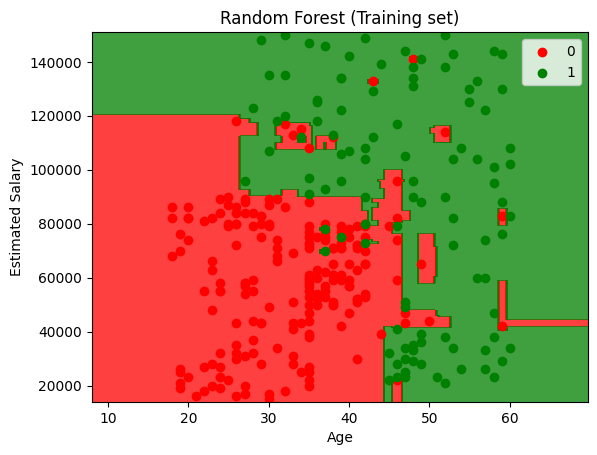

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
# Creating local train x & y
X_set, y_set = sc.inverse_transform(X_train), Y_train
# making a 2D grid for pixels
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# Apply the classifier on all pixel points
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# Detect the limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Forming the plot
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-12-d7e350281287>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


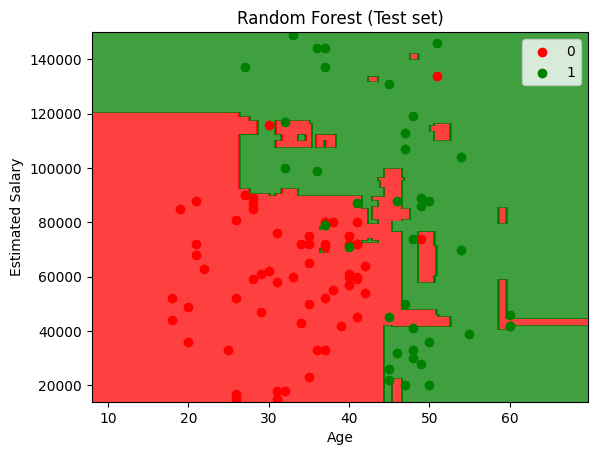

In [12]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()